# Clase 11 Programación I MCD - Solución de tarea

- **Nombre:** Eduardo Basilio Alarcón Gutierrez
- **Código:** 224807924
- **Materia:** Programación I

#### Importamos las librerías requeridas

In [73]:
#Conectar con SQL y generar DF
import pyodbc
import pandas as pd
# Emplearemos estas librerías para hacer datos random
import random
from datetime import datetime, timedelta
#Gráficos
import matplotlib.pyplot as plt

#### Comprobamos que se pueda establecer conexión con SQL

In [3]:
server = r'EDUARDO_A\SQLEXPRESS'
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, autocommit=True) 
    print('Conexión exitosa')
except: 

    print('La conexión no fué exitosa')

Conexión exitosa


## 1. Crear una base de datos llamada DB_Propia

In [5]:
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'
usuario = 'sa'
contrasena= 'eduardo1811A'
    
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd, UID = usuario, PWD = contrasena)                              
    print('Conexión exitosa')

except: 
    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()

#Indicamos lo que queremos que se lleve a cabo en código de SQL
cursor.execute("""
    IF NOT EXISTS (SELECT * FROM sys.databases WHERE name = 'DB_Propia')
        BEGIN
            CREATE DATABASE DB_Propia
        END""")  
print('Base de datos creada con éxito o ya se encontraba creada')
#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa
Base de datos creada con éxito o ya se encontraba creada


## 2. Con tres tablas que contenga campos de tipo INT y de tipo Varchar con la cantidad de filas (10 registros)

Nos aseguramos que las tablas no exitan previamente, para evitar tener errores

In [13]:
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'
    
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd)                              
    print('Conexión exitosa')

except: 
    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()

cursor.execute("""IF OBJECT_ID('Tabla_1', 'U') IS NOT NULL
    DROP TABLE Tabla_1;""")
cursor.execute("""IF OBJECT_ID('Tabla_2', 'U') IS NOT NULL
    DROP TABLE Tabla_2;""")
cursor.execute("""IF OBJECT_ID('Tabla_3', 'U') IS NOT NULL
    DROP TABLE Tabla_3;""")

print('Eliminamos las tablas correctamente')

#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa
Eliminamos las tablas correctamente


### 2.1 Tabla N° 1: Información de cuentas bancarias

Contiene información de los tipos de cuenta que tienen los clientes, en esta tabla contamos con datos de tipo INT, NVARCHAR y FLOAT.

In [15]:
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'
    
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd)                              
    print('Conexión exitosa')
    
except Exception as e:
    print('La conexión no fue exitosa:', e)
    conexion = None

if conexion:
    # Creamos un cursor para ejecutar consultas
    cursor = conexion.cursor()

    # Crear la tabla si no existe
    cursor.execute("""
        IF NOT EXISTS (SELECT * FROM sys.tables WHERE name = 'Tabla_1')
        CREATE TABLE Tabla_1 (
            ID INT PRIMARY KEY,
            Nombre_cliente NVARCHAR(100),
            Cuenta NVARCHAR(50),
            Dinero FLOAT
        )
    """)

    # Funciones para generar datos aleatorios
    def random_date(start_date, end_date):
        delta = end_date - start_date
        random_days = random.randint(0, delta.days)
        return start_date + timedelta(days=random_days)

    def random_name():
        names = [
            "Juan Mendieta", "Ana García", "Carlos Gutierrez", "Marta Alarcón",
            "Luis Pinto", "Sofia Carrasco", "Pedro Heredia", "Lucia Paredes",
            "Javier Baltazar", "Carmen Torres"
        ]
        return random.choice(names)

    def random_cuenta():
        cuenta_nom = [
            "Ahorros", "Plazo fijo", "Sueldo", "Mancomunada",
            "Fondo mutuo", "CTS"
        ]
        return random.choice(cuenta_nom)

    # Insertar 20 filas de datos aleatorios
    for i in range(1, 21):
        nombre_cliente = random_name()
        cuenta = random_cuenta()
        dinero = round(random.uniform(500, 10000), 2)
        cursor.execute("INSERT INTO Tabla_1 (ID, Nombre_cliente, Cuenta, Dinero) VALUES (?, ?, ?, ?)", (i, nombre_cliente, cuenta, dinero))

    # Confirmar los cambios con commit
    conexion.commit()
    print("Tabla 1 creada correctamente")

    # Cerrar la conexión
    conexion.close()

Conexión exitosa
Tabla 1 creada correctamente


### 2.1 Tabla N° 2: Información de movimientos en las cuentas

Contiene información de movimiento en las cuentas bancarias, contiene datos de tipo INT, DATATIME, FLOAT, NVARCHAR y FLOAT.

In [41]:
def random_date(start, end):
    delta = end - start
    random_days = random.randint(0, delta.days)
    return start + timedelta(days=random_days)

server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'

try:
    conexion = pyodbc.connect(driver='{SQL Server}', host=server, database=bd)
    print('Conexión exitosa')

    cursor = conexion.cursor()

    # Crear Tabla_2 si no existe
    cursor.execute("""
        IF NOT EXISTS (SELECT * FROM sys.tables WHERE name = 'Tabla_2')
        BEGIN
            CREATE TABLE Tabla_2 (
                ID INT PRIMARY KEY,
                Fecha_apertura DATETIME,
                Monto_previo FLOAT,
                Fecha_ultimo_movimiento DATETIME,
                Tipo_movimiento NVARCHAR(50),
                Cantidad_movimiento FLOAT
            )
        END
    """)

    # Generar e insertar datos
    start_date = datetime(2000, 1, 1)
    end_date = datetime(2024, 11, 18)

    for i in range(1, 21):
        fecha_apertura = random_date(start_date, end_date)
        monto_previo = round(random.uniform(100, 5000), 2)
        fecha_ultimo_mov = random_date(fecha_apertura, end_date)
        tipo_movimiento = random.choice(["Depósito", "Retiro", "Transferencia"])
        cantidad_mov = round(random.uniform(50, 1000), 2)

        cursor.execute("""
            INSERT INTO Tabla_2 (ID, Fecha_apertura, Monto_previo, Fecha_ultimo_movimiento, Tipo_movimiento, Cantidad_movimiento)
            VALUES (?, ?, ?, ?, ?, ?)
        """, (i, fecha_apertura, monto_previo, fecha_ultimo_mov, tipo_movimiento, cantidad_mov))
    
    conexion.commit()
    print("Tabla 2 creada correctamente y datos insertados.")

except pyodbc.Error as e:
    print("Error de conexión o SQL:", e)

finally:
    conexion.close()
    print("Conexión cerrada.")

Conexión exitosa
Tabla 2 creada correctamente y datos insertados.
Conexión cerrada.


### 2.3 Tabla N°3: Información personal de los clientes

Contiene información personal de los clientes de las cuentas bancarias, contiene datos de tipo INT y NVARCHAR.

In [43]:
# Configuración de conexión
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'

try:                               
    conexion = pyodbc.connect(driver='{SQL Server}', host=server, database=bd)
    print('Conexión exitosa')

    # Creamos un cursor para interactuar con la base de datos
    cursor = conexion.cursor()

    # Crear tabla 3 si no existe
    cursor.execute("""
        IF NOT EXISTS (SELECT * FROM sys.tables WHERE name = 'Tabla_3')
        BEGIN
            CREATE TABLE Tabla_3 (
                ID INT PRIMARY KEY,
                Numero_cliente NVARCHAR(50),
                Correo_cliente NVARCHAR(100),
                Edad_cliente INT
            )
        END
    """)

    # Generar e insertar datos en Tabla_3
    for i in range(1, 21):
        numero_clientes = random.randint(900000000, 999999999)  # Número de cliente
        correo_cliente = f"cliente_{i}@banco.com"  # Correo
        edad_cliente = random.randint(18, 70)  # Edad aleatoria entre 18 y 70 años

        # Inserción de datos
        cursor.execute("""
            INSERT INTO Tabla_3 (ID, Numero_cliente, Correo_cliente, Edad_cliente)
            VALUES (?, ?, ?, ?)
        """, (i, numero_clientes, correo_cliente, edad_cliente))

    # Confirmar la transacción
    conexion.commit()
    print("Tabla 3 creada correctamente y datos insertados.")

except pyodbc.Error as e: 
    print("Error de conexión o SQL:", e)

finally:
    # Asegurarse de cerrar la conexión
    if 'conexion' in locals() and conexion:
        conexion.close()
        print("Conexión cerrada.")

Conexión exitosa
Tabla 3 creada correctamente y datos insertados.
Conexión cerrada.


### 2.4 Visualizamos las tablas creadas

In [45]:
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'
    
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd)                              
    print('Conexión exitosa')

except: 
    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()

# Consultar las tablas y convertirlas en DataFrames
query1 = "SELECT * FROM Tabla_1"
query2 = "SELECT * FROM Tabla_2"
query3 = "SELECT * FROM Tabla_3"

df_tabla1 = pd.read_sql(query1, conexion)
df_tabla2 = pd.read_sql(query2, conexion)
df_tabla3 = pd.read_sql(query3, conexion)

#Nos aseguramos de cerrar la conexió
conexion.close()

Conexión exitosa


C:\Users\alarc\AppData\Local\Temp\ipykernel_22060\2576981772.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tabla1 = pd.read_sql(query1, conexion)
C:\Users\alarc\AppData\Local\Temp\ipykernel_22060\2576981772.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tabla2 = pd.read_sql(query2, conexion)
C:\Users\alarc\AppData\Local\Temp\ipykernel_22060\2576981772.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tabla3 = pd.read_sql(query3, conexion)


In [47]:
# Mostrar los DataFrames
print("Tabla 1:")
print(df_tabla1.head(20))  # Muestra las primeras 20 filas
print("\nTabla 2:")
print(df_tabla2.head(20))
print("\nTabla 3:")
print(df_tabla3.head(20))

Tabla 1:
    ID    Nombre_cliente       Cuenta   Dinero
0    1    Sofia Carrasco      Ahorros  9195.69
1    2   Javier Baltazar      Ahorros   871.15
2    3   Javier Baltazar       Sueldo  4049.12
3    4     Lucia Paredes      Ahorros   609.86
4    5        Ana García       Sueldo  5946.22
5    6     Lucia Paredes   Plazo fijo  8651.64
6    7     Lucia Paredes      Ahorros  5524.82
7    8     Marta Alarcón      Ahorros  7011.21
8    9     Lucia Paredes  Fondo mutuo  2436.05
9   10     Pedro Heredia       Sueldo  8903.00
10  11     Carmen Torres  Mancomunada  3186.62
11  12     Marta Alarcón       Sueldo  3983.89
12  13   Javier Baltazar  Mancomunada  1669.75
13  14  Carlos Gutierrez          CTS  2321.59
14  15   Javier Baltazar  Mancomunada  8394.51
15  16        Luis Pinto      Ahorros  2870.03
16  17     Pedro Heredia          CTS  5354.63
17  18     Carmen Torres          CTS  6892.60
18  19     Juan Mendieta          CTS  7307.05
19  20     Pedro Heredia   Plazo fijo  5568.19

Tab

## 3. Crear un histograma y un gráfico de barras con los datos de Maratón NY previamente importados a una BD

### 3.1 Importamos la información como un DF

In [49]:
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Python'
usuario = 'sa'
contrasena= 'eduardo1811A'
    
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd, UID = usuario, PWD = contrasena)                              
    print('Conexión exitosa')

except: 
    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()
    
# Consultar las tablas y convertirlas en DataFrames
query = "SELECT * FROM [Maraton NY]"

df_maraton = pd.read_sql(query, conexion)

#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa


C:\Users\alarc\AppData\Local\Temp\ipykernel_22060\948802698.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_maraton = pd.read_sql(query, conexion)


Vemos los datos del DF importado

In [51]:
df_maraton.head(10)

,Corredor,place,gender,age,home,time
0,3475,3592,Male,52,GBR,217.483337
1,13594,13853,Female,40,NY,272.549988
2,12012,12256,Male,31,FRA,265.283325
3,10236,10457,Female,33,MI,256.149994
4,9476,9686,Male,33,NY,252.250000
5,1720,1784,Male,40,NJ,201.966660
6,15736,16020,Female,30,CA,283.566681
7,10580,10805,Male,27,GBR,255.883331
8,11957,12201,Male,42,NED,264.250000
9,18933,19266,Male,48,B.C,306.683319


### 3.2 Histograma

Creamos un histograma para ver la distribución de edades de participantes

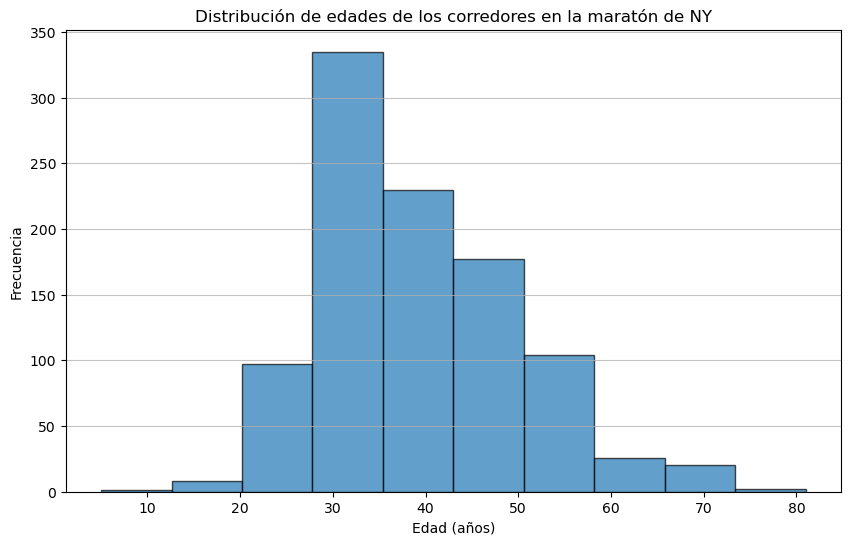

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df_maraton['age'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribución de edades de los corredores en la maratón de NY')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 3.3 Gráfico de barras

Creamos un gráfico de barras para ver la procedencia de los participantes en la maratón

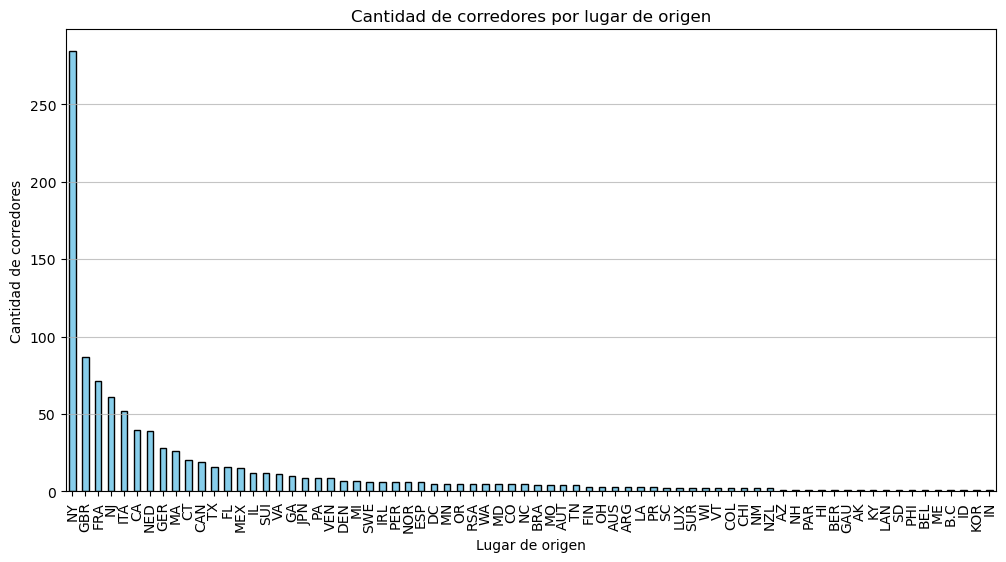

In [55]:
# Crear un gráfico de barras usando la columna 'home' como ejemplo
plt.figure(figsize=(12, 6))
df_maraton['home'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de corredores por lugar de origen')
plt.xlabel('Lugar de origen')
plt.ylabel('Cantidad de corredores')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', alpha=0.75)
plt.show()

## 4. Agregamos código para unir base de datos

### 4.1 Modificamos nombre de las columnas de identificación

In [61]:
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd, autocommit=True) 
    print('Conexión exitosa')

except: 
    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()

#Indicamos lo que queremos que se lleve a cabo en código de SQL
cursor.execute("""
    EXEC sp_rename 'Tabla_2.ID', 'IDEN', 'COLUMN';
    """) 

print('Columna renombrada con éxtio')
#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa
Columna renombrada con éxtio


In [63]:
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd, autocommit=True) 
    print('Conexión exitosa')

except: 
    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()

#Indicamos lo que queremos que se lleve a cabo en código de SQL
cursor.execute("""
    EXEC sp_rename 'Tabla_3.ID', 'IDE', 'COLUMN';
    """) 

print('Columna renombrada con éxtio')
#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa
Columna renombrada con éxtio


### 4.2 Unimos las bases de datos

In [66]:
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd, autocommit=True) 
    print('Conexión exitosa')

except: 
    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()

#Indicamos lo que queremos que se lleve a cabo en código de SQL
cursor.execute("DROP TABLE IF EXISTS Tabla_unida") 

print('Base de datos borrada con éxito')
#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa
Base de datos borrada con éxito


In [68]:
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd, autocommit=True) 
    print('Conexión exitosa')

except: 
    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()

#Indicamos lo que queremos que se lleve a cabo en código de SQL
cursor.execute("""
    SELECT t1.*, t2.*, t3.*
    INTO Tabla_unida
    FROM Tabla_1 t1
    INNER JOIN Tabla_2 t2 ON t1.ID = t2.IDEN
    INNER JOIN Tabla_3 t3 ON t1.ID = t3.IDE;
    """) 

print('Base de datos unida con éxito')
#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa
Base de datos unida con éxito


### 4.3 Creamos DF a partir de las tablas de SQL

In [71]:
server = r'EDUARDO_A\SQLEXPRESS'
bd = 'DB_Propia'
    
try:                               
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd)                              
    print('Conexión exitosa')

except: 
    print('La conexión no fué exitosa')
    

clientes_edad = pd.read_sql("SELECT Nombre_cliente, Edad_cliente FROM Tabla_unida", conexion)
clientes_dinero = pd.read_sql("SELECT Nombre_cliente, Dinero FROM Tabla_unida", conexion)
clientes_tipo_cuenta = pd.read_sql("SELECT Nombre_cliente, Cuenta FROM Tabla_unida", conexion)

#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa


C:\Users\alarc\AppData\Local\Temp\ipykernel_22060\49756177.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  clientes_edad = pd.read_sql("SELECT Nombre_cliente, Edad_cliente FROM Tabla_unida", conexion)
C:\Users\alarc\AppData\Local\Temp\ipykernel_22060\49756177.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  clientes_dinero = pd.read_sql("SELECT Nombre_cliente, Dinero FROM Tabla_unida", conexion)
C:\Users\alarc\AppData\Local\Temp\ipykernel_22060\49756177.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  clientes_